In [42]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [32]:
num=5
prime = True
for i in range(2, num - 1):
    if num % i == 0:
        print(i)
        print(num % i)
        prime = False

if prime:
    print("prime")
else:
    print("not prime")

prime


### Importantly, the char-rnn code comes from [*this repository*](https://github.com/spro/char-rnn.pytorch)! It made training and generation so simple. The files `generate.py`, `model.py`, `helpers.py`,   `train.py`, `LICENSE`, and `README.md` are from this repo. The files/folders I created are `data`,  `results`, `saved_graphs`, `trained`, `similarity_results.csv`, `vis.ipynb`, `calculate_similarity.py`, and `automate_all.py`.

## Collect similarity results

In [60]:
def map_input_size(value):
    if "1" in value:
        return 1
    elif "3" in value:
        return 3
    elif "5" in value:
        return 5
    return None  # Default case if needed

similarities = pd.read_csv('similarity_results.csv')
similarities["input_size"] = similarities["input_size"].apply(map_input_size)

# a=generation_size 200
# b=generation_size 100
# c=generation_size 100
# d=generation_size 200
# e=generation_size 200
similarities

,trained_original,input_original,input_size,generation_num,similarity_to_trained,similarity_to_input
0,paradise_lost.txt,treasure_island.txt,3,100,0.915525,0.903258
1,divine_comedy.txt,shakespeare.txt,1,100,0.929411,0.770853
2,treasure_island.txt,shakespeare.txt,5,100,0.964125,0.831165
3,treasure_island.txt,paradise_lost.txt,5,100,0.961875,0.857784
4,iliad.txt,treasure_island.txt,1,100,0.967596,0.871996
...,...,...,...,...,...,...
445,iliad.txt,treasure_island.txt,1,200,0.973877,0.881117
446,paradise_lost.txt,paradise_lost.txt,3,200,0.959328,0.959328
447,divine_comedy.txt,shakespeare.txt,3,200,0.960043,0.839852
448,shakespeare.txt,shakespeare.txt,5,200,0.959766,0.959766


## Stratify by training data

In [88]:
pl_trained = similarities[similarities["trained_original"] == "paradise_lost.txt"]
dc_trained = similarities[similarities["trained_original"] == "divine_comedy.txt"]
iliad_trained = similarities[similarities["trained_original"] == "iliad.txt"]
shakespeare_trained = similarities[similarities["trained_original"] == "shakespeare.txt"]
ti_trained = similarities[similarities["trained_original"] == "paradise_lost.txt"]

### Plot settings

In [126]:
color_dict = {
    "shakespeare.txt": "#9370DB",
    "paradise_lost.txt": "#D14F4f",
    "divine_comedy.txt": "#FFa500",
    "iliad.txt": "#3CB371", 
    "treasure_island.txt": "#4682B4"
}

## Check out Paradise Lost data

/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_40641/2642526022.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=pl_trained, x="similarity_to_trained", y="similarity_to_input",


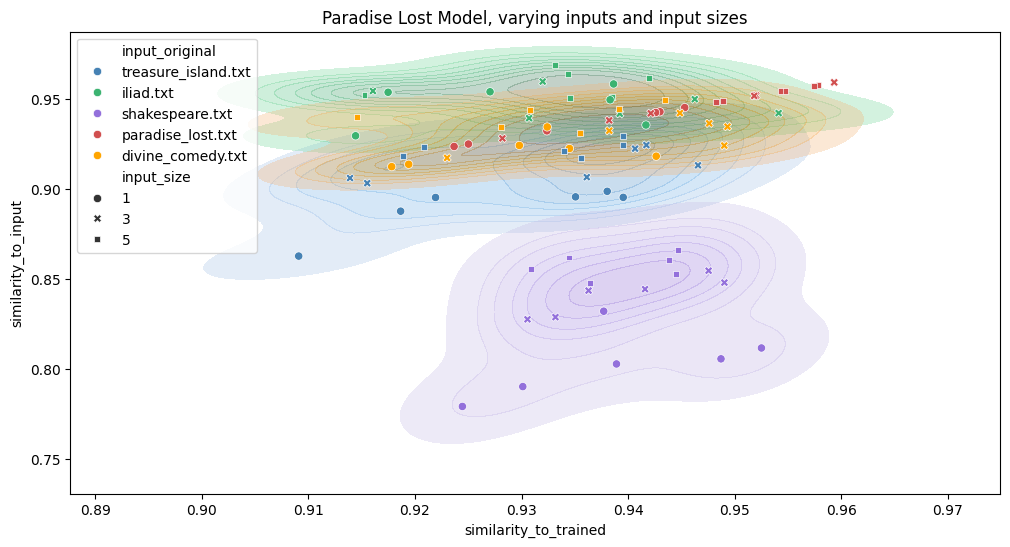

In [134]:
plt.figure(figsize=(12, 6))
plt.title("Paradise Lost Model, varying inputs and input sizes")

sns.kdeplot(data=pl_trained, x="similarity_to_trained", y="similarity_to_input", 
            hue="input_original", fill=True, alpha=0.3, palette=color_dict)

sns.scatterplot(data=pl_trained, x="similarity_to_trained", y="similarity_to_input", 
                hue="input_original", style="input_size", palette=color_dict)

plt.show()

/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_40641/954588376.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=dc_trained, x="similarity_to_trained", y="similarity_to_input",


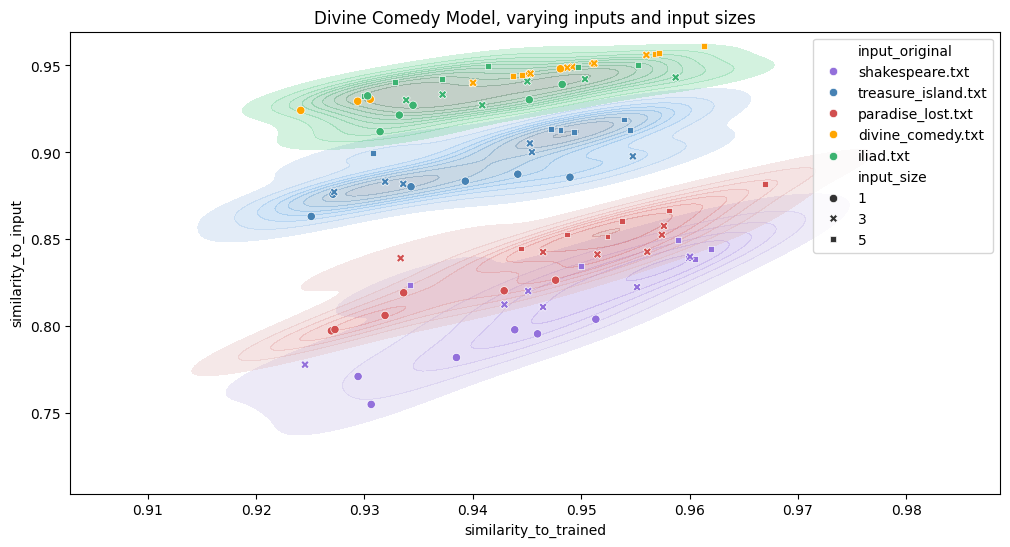

In [133]:
plt.figure(figsize=(12, 6))
plt.title("Divine Comedy Model, varying inputs and input sizes")

sns.kdeplot(data=dc_trained, x="similarity_to_trained", y="similarity_to_input", 
            hue="input_original", fill=True, alpha=0.3, palette=color_dict)

sns.scatterplot(data=dc_trained, x="similarity_to_trained", y="similarity_to_input", 
                hue="input_original", style="input_size", palette=color_dict)

plt.show()

/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_40641/2559374000.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ti_trained, x="similarity_to_trained", y="similarity_to_input",


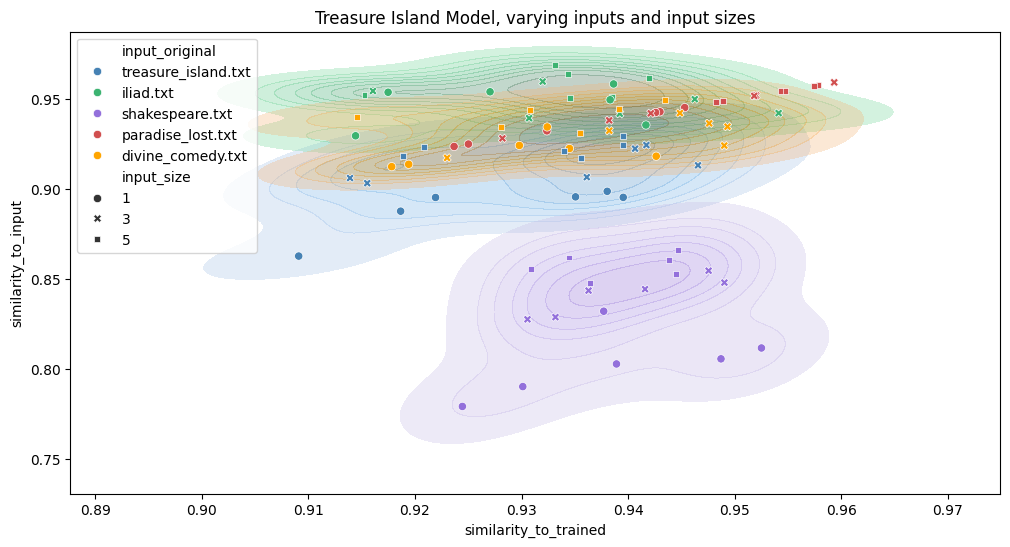

In [132]:
plt.figure(figsize=(12, 6))
plt.title("Treasure Island Model, varying inputs and input sizes")

sns.kdeplot(data=ti_trained, x="similarity_to_trained", y="similarity_to_input", 
            hue="input_original", fill=True, alpha=0.3, palette=color_dict)

sns.scatterplot(data=ti_trained, x="similarity_to_trained", y="similarity_to_input", 
                hue="input_original", style="input_size", palette=color_dict)

plt.show()

/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_40641/2777101011.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=shakespeare_trained, x="similarity_to_trained", y="similarity_to_input",


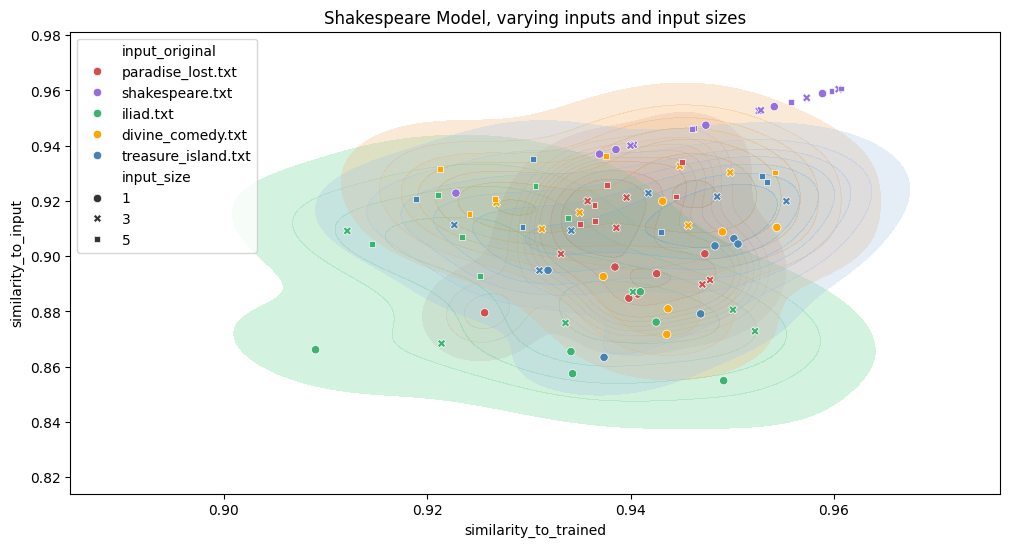

In [131]:
plt.figure(figsize=(12, 6))
plt.title("Shakespeare Model, varying inputs and input sizes")

sns.kdeplot(data=shakespeare_trained, x="similarity_to_trained", y="similarity_to_input", 
            hue="input_original", fill=True, alpha=0.3, palette=color_dict)

sns.scatterplot(data=shakespeare_trained, x="similarity_to_trained", y="similarity_to_input", 
                hue="input_original", style="input_size", palette=color_dict)

plt.show()

/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_40641/1205587138.py:4: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=iliad_trained, x="similarity_to_trained", y="similarity_to_input",


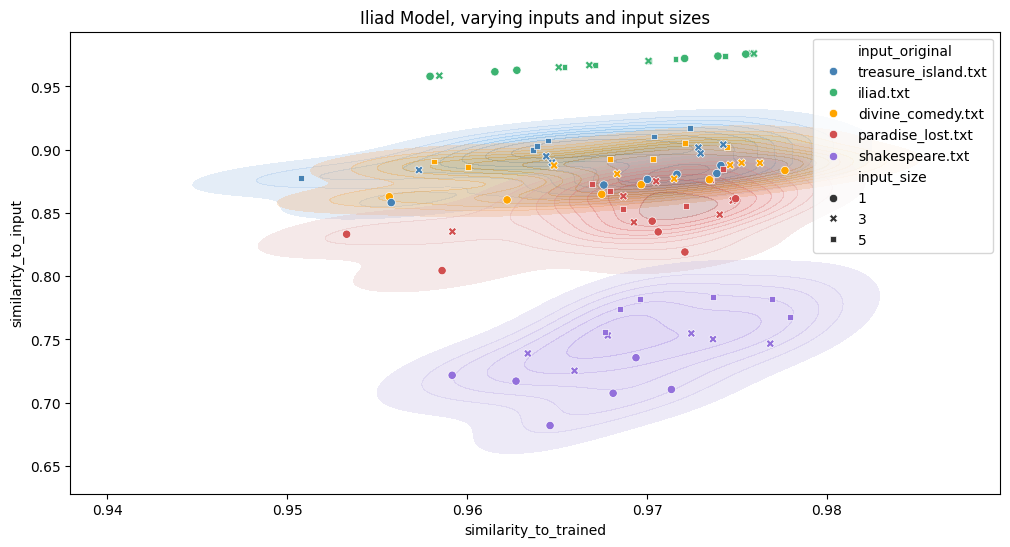

In [135]:
plt.figure(figsize=(12, 6))
plt.title("Iliad Model, varying inputs and input sizes")

sns.kdeplot(data=iliad_trained, x="similarity_to_trained", y="similarity_to_input", 
            hue="input_original", fill=True, alpha=0.3, palette=color_dict)

sns.scatterplot(data=iliad_trained, x="similarity_to_trained", y="similarity_to_input", 
                hue="input_original", style="input_size", palette=color_dict)

plt.show()